#Pytorch Toy Project 2

How to make CUSTOM Dataset (by imjjun KUBIG 16th)



---


It is important to make the Network with some unique layers but handling with Dataset is also very important to utilize pre-organized models. We could use those models on some contests or projects.

In this notebook, we might learn the pytorch's Dataset & DataLoader and handle some datasets to participate previous contests.


#DataModule


*This notebook is based on the official tutorial of pytorch docs.

Our goal is to make the 'Dataset iterator' to let the model fed. Pytorch fundametally offers the DataModule Class so that we could make our customized dataset for our us, which are ***Dataset***(loading the file) & ***DataLoader***(make it iterate)

This notebook contains the simple & image-related exmaple. Therefore, we would make another Customized Dataset for NLP(Natural Language Process)!

In [2]:
#Let's load the ordinary Dataset: FashionMNIST

import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data", #경로
    train=True,  #train=True: 학습용 데이터 / train=False: 추론용 데이터
    download=True, #다운로드=True, 이미 다운로드 받았으면 False로 설정 가능
    transform=ToTensor() #transform: 이미지 변환(주로 Tensor화 혹은 Normalization 수행)
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 15277664.39it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 274284.20it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5078566.27it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 11118577.24it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
# print(type(training_data))
# print(type(test_data))

print(training_data[3][0].squeeze())
print(training_data[3][1])

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1294,
         0.3765, 0.6863, 0.6118, 0.2510, 0.0549, 0.2118, 0.5373, 0.8000, 0.7608,
         0.4000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2863, 0.7294, 0.6941,
         0.7176, 0.6863, 0.7373, 0.9098, 1.0000, 0.8745, 0.8588, 0.7608, 0.7020,
         0.7294, 0.8353, 0.5725, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1373, 0.6392, 0.5490, 0.5882,
         0.5961, 0.5882, 0.5725, 0.6863, 0.6863, 0.6784, 0.6706, 0.6118, 0.5961,
         0.5804, 0.5059, 0.6118, 0.5490, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5882, 0.5569, 0.5490, 0.5961,
         0.6275, 0.6118, 0.5725, 0.5569, 0.4980, 0.5294, 0.5216, 0.5490, 0.5490,
         0.5373, 0.5216, 0.4902, 0.6627, 0.2941, 0.0000

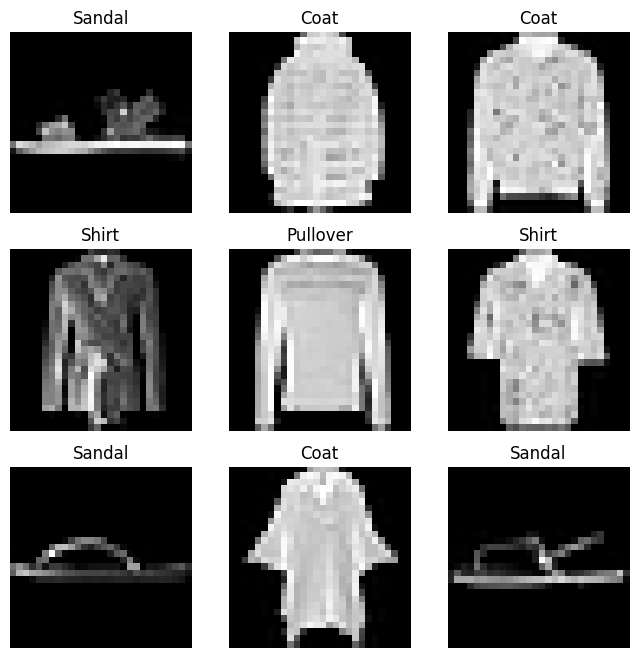

In [4]:
#We can access the data as list!

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item() ## torch.randint : 정해진 범위 내에서 정수형 난수를 생성
    img, label = training_data[sample_idx] #If you access the dataset as list, the two stuffs are returned, Data & Label
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray") #squeeze: delete the dimension which is one-dimensional
plt.show()

##Dataset

*Prerequisites: Inheritance of OOP(Object-oriented Programming)

*Please refer to this article if you wanna know more: https://compmath.korea.ac.kr/oop/Inheritance.html

In Dataset Class, there are three modules, \__init__(), \__len__() and \__getitem()__. This class is inherited by the class: torch.utils.data.Dataset.

- \__init__(): literally initialize the Class. We will load the data on the Class by defining some methods here.

- \__len__(): literally return the length of data. This is necessary to calculate the batch index, etc

- \__getitem__(): literally return the data which are needed for model. For example, image with label, or sentence with label, real image with targeted image etc

In [5]:
import os
import pandas as pd
from torchvision.io import read_image


#For FashionMNIST Data, images are stored in the 'img_dir' & labels are stored in 'annotations_file.csv'
#csv filename extension is commonly loaded, using the python library 'pandas'
#By using the embedded method: 'read_image' which is similar to opencv's 'imread'


class CustomImageDataset(Dataset): #Inheritance!!

    #intialize our dataset and make inputs self.object

    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file, names=['file_name', 'label']) #read annotation file
        self.img_dir = img_dir #image directory
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):  #always self in Class
        return len(self.img_labels) #return length #Usually return the label's length, since it's simpler

    def __getitem__(self, idx): #we have to contain the variable
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

##DataLoader


Fortunately, pytorch provides Basic dataloader module, "DataLoader"!

If we define our dataset as pytorch's Dataset Class, then we can wrap up that dataset simply. Just use DataLoader Module from torch.utils.data. We can iterate that module by method **'iter()'** but the dataloader is actually not frequently used directly.

There are some variables which you have to choose:

- **Batch Size**: You have to choose your batch size, considering your domain, hardware etc. Usually, the bigger batch size, the better performance.

- **shuffle**: Usually True on Train Dataset & False on Test Dataset

- **pin_memory**: Simply speaking, data is allocated directly to VRAM, not to DRAM (Dram is what we usually call RAM & VRAM is RAM of GPU)

- **num_workers**: the number of subprocss of data multi processing [ Usually set to 4 * (the # of GPU) ]

In [6]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)

In [7]:
print(type(train_dataloader))
print(type(test_dataloader))

<class 'torch.utils.data.dataloader.DataLoader'>
<class 'torch.utils.data.dataloader.DataLoader'>


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


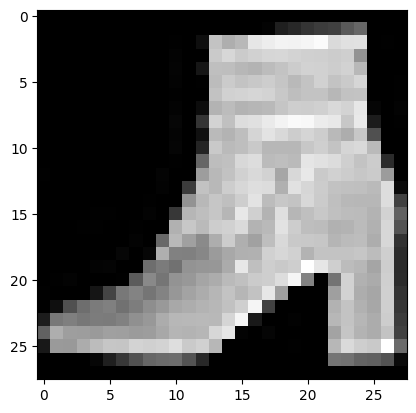

Label: 9
torch.Size([28, 28])


In [8]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")
print(img.shape)
# train feature size에서 맨 앞은 batch size라 건들지 않는다고 함
# (1 * 28 * 28) 크기의 그림이 64개 있는건데 이걸 squeeze 해주면 (28 * 28) 크기로 변화

#Data Link



https://dacon.io/competitions/official/235747/overview/description

We will participate this competition on the next month :)


## 1) Download the Dataset

In [9]:
!gdown 1pg-Q42ybABcXaoInyF-QRqdr8tRx3A-R

Downloading...
From: https://drive.google.com/uc?id=1pg-Q42ybABcXaoInyF-QRqdr8tRx3A-R
To: /content/open.zip
100% 1.91M/1.91M [00:00<00:00, 184MB/s]


In [10]:
!unzip /content/open.zip

Archive:  /content/open.zip
  inflating: sample_submission.csv   
  inflating: test_data.csv           
  inflating: topic_dict.csv          
  inflating: train_data.csv          


## 2) Install the one of NLP packages, Transformer

In [11]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.4 MB/s eta 0:00:00


In [12]:
from transformers import AutoTokenizer #This AutoTokenizer would be useful to make word embeddings
import torch

# @@@@@@@@@@@@@@@ 테스트용 코드 @@@@@@@@@@@@@@@@@ #

# 마지막 옵션을 빼줘야만 정상 작동 하네요??
# 옵션을 싹 벗기고 어떤 느낌으로 작동하는지만 확인해봤습니다.
# y=tokenizer(text, return_tensors='pt',truncation=True, max_length=20, pad_to_max_length=True, add_special_token=True)

# case 1: text가 str 일 경우,

# text="나는 오늘 저녁으로 닭가슴살을 먹을 예정이다."
# tokenizer=AutoTokenizer.from_pretrained("klue/roberta-large")
# y=tokenizer(text)
# print(y)

# case 2: text가 list 일 경우,

# tokenizer=AutoTokenizer.from_pretrained("klue/roberta-large")
# text = ["나는 나비", "아니 나는 윤모", "아니 나는 사나이"]
# y= tokenizer(text)
# print(y)


#https://huggingface.co/docs/transformers/v4.24.0/en/main_classes/tokenizer#transformers.PreTrainedTokenizer <- You can refer to it

#Access like 'config'

#input_id=y['input_ids']

#attention_mask=y['attention_mask']
## Note: attention_mask ~ 어떤 토큰들이 실제로 정보를 가지고 있는지를 나타내느 이진 값의 시퀀스

"""Inputs:
    - text -> sentence
    - return_tensor -> 'pt': pytorch, 'np': numpy etc
    - truncation -> Allow sentence truncation(문장 잘림)
    - max length -> Word embeddings' maximal length for dimensionality
    - pad to max length -> Match the length with the longest sentence
    - add_special_token -> Add special tokens related to pretrained model(BERT, RoBERTa etc)
"""

"""Outputs:
    - input_ids -> Table of Tokenized inputs
    - attention_mask -> Seperating between token and padded token
"""

{'input_ids': [[0, 717, 2259, 10577, 2], [0, 3614, 717, 2259, 1492, 2391, 2], [0, 3614, 717, 2259, 10621, 2]], 'token_type_ids': [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]}


'Outputs:\n    - input_ids -> Table of Tokenized inputs\n    - attention_mask -> Seperating between token and padded token\n'

## 3) How does the dataset look like?


Output: You have to show the csv file by any methods(pandas, numpy etc). Plz print it out on this ipynb.

In [13]:
#Plz print out the dataset by any methods

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import pandas as pd

train_data_path = "/content/train_data.csv"

df = pd.read_csv(train_data_path)
df.head()

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4


In [56]:
tokenizer=AutoTokenizer.from_pretrained("klue/roberta-large")

test = list(df["title"])
tokenizer(test )

Output hidden; open in https://colab.research.google.com to view.

In [57]:
test = list(df["title"])[:10]
test = tokenizer(test)
test = torch.tensor(test["input_ids"][3], dtype=torch.long)
print(test)

tensor([    0, 23492, 10305,  8351,   533,  3646,  5177,  8812,  6288,   121,
        14271,  1233, 13223, 27854,     2])


## 4) Make your Dataset!

Make only **'train set'**, not test set

In [51]:
# define your function or code to utilize the given dataset as pytorch Dataset !
# You can refer to the code sharing tap of above dacon homepage :)

from torch.utils.data import Dataset, DataLoader

################################################################
## 참고 1: 구글링 사례, 각 메서드가 가져야하는 역할

#   def __init__(self):
#     데이터셋의 전처리를 해주는 부분

#   def __len__(self):
#     데이터셋의 길이. 즉, 총 샘플의 수를 적어주는 부분

#   def __getitem__(self, idx):
#     데이터셋에서 특정 1개의 샘플을 가져오는 함수

################################################################
## 참고 2: dacon 예시
## 다만 이는 기본적인 전처리 후의 data를 넘겨주는 것 같음 (참고만 하자)

## class KobertDataSet(Dataset):

#     def __init__(self, data, test=False):

#         self.data = data
#         self.test = test

#     def __len__(self):

#         return self.data['input_ids'].shape[0]

#     def __getitem__(self,idx):

#         ids = torch.tensor(self.data['input_ids'][idx], dtype=torch.long)
#         mask = torch.tensor(self.data['attention_mask'][idx], dtype=torch.long)
#         token_type_ids = torch.tensor(self.data['token_type_ids'][idx], dtype=torch.long)


#         if self.test:
#             return {
#                 'ids': ids,
#                 'mask': mask,
#                 'token_type_ids': token_type_ids
#             }

#         else:
#             target = torch.tensor(self.data['targets'][idx],dtype=torch.long)

#             return {
#                     'ids': ids,
#                     'mask': mask,
#                     'token_type_ids': token_type_ids,
#                     'targets': target
#                 }

# 이 녀석만 툭 튀어나와있는 것이 불편하네요.
tokenizer=AutoTokenizer.from_pretrained("klue/roberta-large")

class NLPDataset_train(Dataset):

    """ Dataset Implementation
        You have to implement them on __init__,
        and return your embeddings through __getitem__ (Outputs might be returned through this method).
        Don't forget the __len__!

        Inputs:
        - csv file which contains ['topic','classification index']
        - AutoTokenizer of Transformer for word embeddings -> Vectorization of Sentences

        Outputs:
        - input_ids:idx of given sentence
        - attention_mask: Simply, word embeddings
        - label: the category of given sentence


    """
    # def __init__(self, csv, tokenizer): 기존에는 변수를 이렇게만 받았는데, 어쩌다보니 몇개 늘어났습니다.
    def __init__(self, file_path, file_name, tokenizer):
      self.klue_labels = list(pd.read_csv(file_path + file_name)["topic_idx"])   # pandas의 series로 접근하면 에러가 뜨는 것 같아서 list 처리를 좀 해봤는데 이게 맞겠죠?
      self.klue_trains = list(pd.read_csv(file_path + file_name)["title"])
      self.klue_dir = file_path + file_name
      self.tokenizer = tokenizer

      # 위의 기본 옵션을 따랐습니다.
      self.tokenized_klue_trains = self.tokenizer(self.klue_trains, return_tensors='pt',truncation=True, max_length=20, pad_to_max_length=True)

      return None

    def __len__(self):
      return len(self.klue_labels)

    def __getitem__(self, idx):

        # 위의 참고 코드에서 dtype=torch.long으로 해서 따라해봤는데, 이유까지는 잘 모르겠습니다.
        ids = torch.tensor(self.tokenized_klue_trains["input_ids"][idx], dtype=torch.long)
        mask = torch.tensor(self.tokenized_klue_trains["attention_mask"][idx], dtype=torch.long)
        token_type_ids = torch.tensor(self.tokenized_klue_trains["token_type_ids"][idx], dtype=torch.long)
        targets = torch.tensor(self.klue_labels[idx], dtype=torch.long)

        return { "ids" : ids, "mask" : mask, "token_type_ids" : token_type_ids}
        # return { "ids" : ids, "mask" : mask, "token_type_ids" : token_type_ids, "targets": target}
        # 위의 예시에서(dacon 참고 코드), target을 포함시켰길래 포함시켜야하나 했는데 아래 할당된 변수가 3개라 우선 뺐습니다

        # 그런데도 이상하게 에러가 뜨네요??????
        # 분명 return으로 3개만 할당해줬는데 말이죠...

        # 아직 확실하게 감이 오지는 않지만 대략 이렇게 하겠구나 하고 구현해봤습니다!
        # 재미지네요 하하하



5) See what components are iterated!

In [54]:
file_path = "/content/"
file_name = "train_data.csv"

#Loading your dataset
train_loader = DataLoader(NLPDataset_train(file_path, file_name, tokenizer), batch_size=16, shuffle=True)
# input_iter, mask_iter, label_iter = iter(train_dataloader)
input_iter, mask_iter, label_iter = iter(train_loader)
# print(iter(train_loader))

#Print out train batch !
print(f"Feature batch: {next(input_iter), next(mask_iter)}")
print(f"Feature batch size: {next(input_iter.shape, next(mask_iter.shape))}")
print(f"Labels batch & size: {next(label_iter), next(label_iter.shape)}")

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2393: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
<ipython-input-51-e940d09623da>:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ids = torch.tensor(self.tokenized_klue_trains["input_ids"][idx], dtype=torch.long)
<ipython-input-51-e940d09623da>:93: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.cl

ValueError: ignored

In [ ]:
# ValueError: too many values to unpack (expected 3)

# 구글링 결과, 딥러닝에서 자주 등장하는 에러는 아닌 것 같습니다.
# 에러 원인은 잘 모르겠네요 ㅜㅜㅜㅜ